In [106]:
from fastai.vision.all import *

In [107]:
path = untar_data(URLs.MNIST_SAMPLE)

In [108]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [109]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [110]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [111]:
im3_path = threes[1]
im3 = Image.open(im3_path)

im3

In [112]:
# Look at the numbers that make up this image as a NumPy array

array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [113]:
# And the same thing as a Pytorch tensor:

tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [114]:
# Can use pandas to highlight where the pixels are brightest

im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [115]:
# Maybe try getting average pixel values for both 3s and 7s?

# First create a tensor containing all of our 3s stacked together using
# list comprehension

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

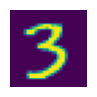

In [116]:
# Make sure we got something that's actually a 3:

show_image(three_tensors[1])

For every pixel position, want to compute the average over all the images of the intensity of that pixel.

To do that, need to stack all of the images into a single 3D tensor (called a rank-3 tensor). Often need to stack up individual tensors in a collection into a single tensor.

In [117]:
# Use stack to do that, also need to cast to a float for operations later.
# To do that, just do .type(), so .float() casts to a float.

# Also divide by 255 so the pixel values are between 0 and 1:

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_threes.shape # 6131 images that are 28 x 28 pixels each

torch.Size([6131, 28, 28])

In [118]:
# Length of a tensor's shape is its rank:

len(stacked_threes.shape)

3

**Important note:**

The *rank* of a tensor is the number of axes or dimensions it has.

The *shape* is the size of each axis of a tensor.

To compute what the ideal 3 looks like, we calculate the mean of all the image tensors by taking the mean along dimension 0 of our stacked, rank-3 tensor. This is the dimension that indexes over all the images.

In other words, for every pixel position, we will compute the average of that pixel over all images. The result will be one value for every pixel position, or a single image.

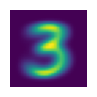

In [119]:
mean3 = stacked_threes.mean(0)

show_image(mean3);

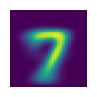

In [120]:
mean7 = stacked_sevens.mean(0)

show_image(mean7);

The image is bright and clear where the images agree with each other, and becomes lighter, wispy, and blurry when there is disagreement among the images.

<Axes: >

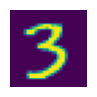

In [121]:
# Sample 3

a_3 = stacked_threes[1]

show_image(a_3)

To identify a 3 vs a 7, we can measure the distance of a sampled/test digit from its average on a pixel-by-pixel basis. Two general ways to do this without worrying about positive/negative differences:

* Take the mean of the *absolute value* of differences. This is the *mean absolute difference* or the *L1 norm*.
Take the mean of the square of the differences, then square that. This is the *root mean squared error (RMSE)* or *L2 norm*.

In [122]:
# Let's try both of these:

dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()

dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [123]:
# Let's try both of these:

dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()

dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In both of these cases, the distance between our 3 and the ideal 3 is less than the distance to the ideal 7, so this works.

PyTorch has both of these as loss functions:

In [124]:
# Want to import these as F:

import torch.nn.functional as F

F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()


(tensor(0.1586), tensor(0.3021))

# NumPy Arrays and PyTorch Tensors

NumPy arrays don't have GPU support or calculate gradients, both of which we need for DL.

A PyTorch tensor is nearly the same thing as a NumPy array in that it is a multidimensional table of data with all items of the same type. The restriction is that the type has to be a basic numeric type for all components.

PyTorch tensors can also live on the GPU, and can also calculate derivatives automatically, which greatly speed things up.



# Key Array/Tensor Commands

In [125]:
# Create an array or tensor

data = [[1, 2, 3], [4, 5, 6]]

arr = array(data)
tns = tensor(data)

In [126]:
arr # NumPy

array([[1, 2, 3],
       [4, 5, 6]])

In [127]:
tns # PyTorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [128]:
# We'll focus on tensors here, but the syntax for NumPy arrays is identical.

# Select a row
tns[1]

tensor([4, 5, 6])

In [129]:
# Select a column, where : indicates all of the first axis

tns[:, 1]

tensor([2, 5])

# Back to MNIST

In [130]:
# Create tensors for validation set in the validation directory

valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [131]:
# Write a function that calculates the mean absolute error:

def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

mnist_distance(a_3, mean3)

tensor(0.1114)

In [132]:
# But we need to do this for every image. Could loop over every image, or we
# could just pass a tensor to the function:

valid_3_dist = mnist_distance(valid_3_tens, mean3)

valid_3_dist, valid_3_dist.shape

(tensor([0.1539, 0.1133, 0.1433,  ..., 0.1087, 0.1214, 0.1247]),
 torch.Size([1010]))

If we have a tensor of rank 1 that is interacting with a tensor of a higher rank through some operation (like substraction), PyTorch automatically does everything elementwise (this is called *broadcasting*)

In [133]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [134]:
# Can also pass the entire tensor thanks to broadcasting

is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [135]:
# Then calculate the accuracy for each of the 3s and 7s by taking the
# average of that funtion for all 3s and its inverse for all 7s:

accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2


(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# SGD

In [136]:
def f(x): return x**2

# Pick a tensor value which we want to find gradients at:

xt = tensor(3.).requires_grad_()

# The requires_grad_() method tells PyTorch we want to calculate gradients
# w.r.t. that variable at that value.

yt = f(xt)

yt

tensor(9., grad_fn=<PowBackward0>)

In [137]:
# Calculate the gradients (aka backward for backprop)

yt.backward()

In [138]:
xt.grad

tensor(6.)

This value makes sense, since the derivative of $x^2$ is $2x$, and here we have $x = 3$, so the gradient is $(2)(3)=6$. We can do the same thing as before, just with a vector argument instead.

In [139]:
xt = tensor([3., 4., 10.]).requires_grad_()

xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [140]:
# Add a sum to our function to it can take a vector (a rank-1 tensor) and return
# a scalar (a rank-0 tensor):

def f(x): return(x**2).sum()

yt = f(xt)

yt = f(xt)

yt

tensor(125., grad_fn=<SumBackward0>)

In [141]:
yt.backward()

xt.grad # Only gives us the slopes, not how far to adjust them

tensor([ 6.,  8., 20.])

# End-to-End SGD Example

Example: Measuring the speed of a roller coaster as it went over the top of a hump as a function of time.

We want a function to represent this that's based on a quadratic function of the form $a \times \left(\text{time}^2\right) + (b \times \text{time} ) + c$.

In [142]:
time = torch.arange(0, 20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

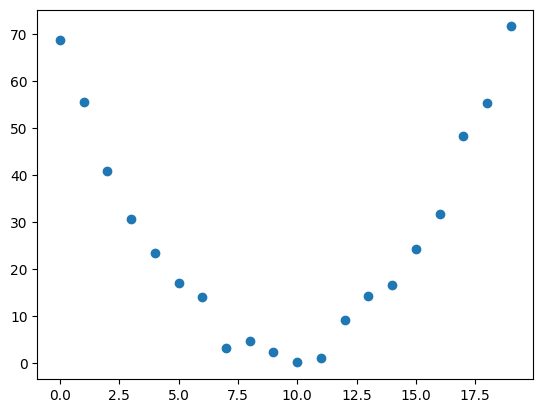

In [143]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time, speed)

In [144]:
# Want to distinguish clearly between function's input (time) and its parameters
# (values that define the quadratic):

def f(t, params):
  a, b, c = params

  return a*(t**2) + (b*t) + c


So here, we restricted the problem of finding the best imaginable function that fits the data to the best *quadratic* function, so we only need three parameters $a$, $b$, and $c$. Next step is to define what we mean by *best*, which is where the loss function comes in.

For continuous data, typically use the mean squared error.

In [145]:
def mse(preds, targets): return ((preds-targets)**2).mean()

## Step 1: Initialize the Parameters

In [146]:
# Initialize the parameters to random values, tell PyTorch to track the
# gradients with requires_grad_

params = torch.randn(3).requires_grad_()

## Step 2: Calculate the Predictions

In [147]:
preds = f(time, params)

In [148]:
# Create a function to see how close our predictions are to our targets:

def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-100, 500)

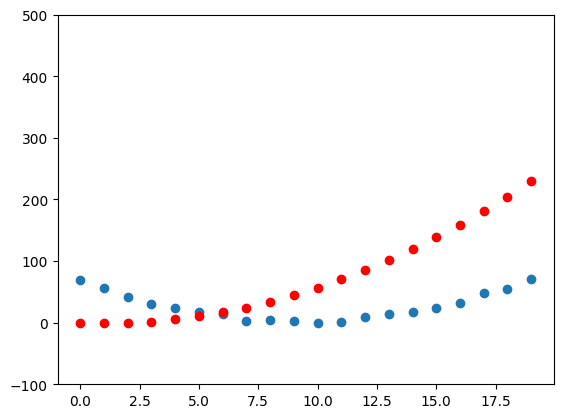

In [149]:
show_preds(preds)

## Step 3: Calculate the Loss

That plot is shit, so calculate the loss so we can make it significantly less shit:

In [150]:
loss = mse(preds, speed)

loss

tensor(6996.5728, grad_fn=<MeanBackward0>)

## Step 4: Calculate the Gradients

Calculate the gradients to figure out how the parameters should change.

In [151]:
loss.backward()

params.grad

tensor([26737.1250,  1694.8324,    94.7731])

In [152]:
# specify a learning rate

lr = 1e-5

params.data -= lr * params.grad.data
params.grad = None

In [153]:
# Check the loss again

preds = f(time, params)

mse(preds, speed)

tensor(1846.6539, grad_fn=<MeanBackward0>)

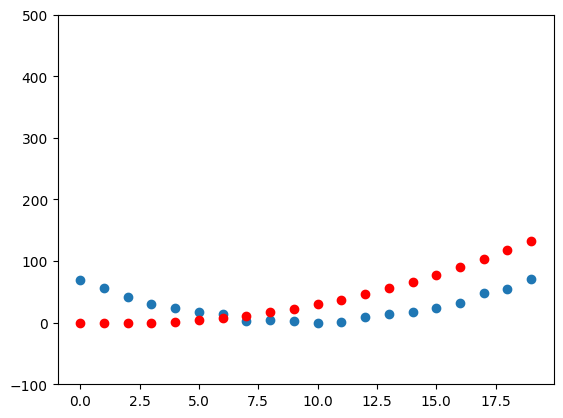

In [154]:
show_preds(preds)

In [155]:
# Need to repeat this a few times, so create a function to do this a few times:

def apply_step(params, prn=True):
  preds = f(time, params)

  loss = mse(preds, speed)
  loss.backward()

  params.data -= lr * params.grad.data
  params.grad = None

  if prn: print(loss.item())

  return preds

## Step 6: Repeat the Process

In [156]:
for i in range(10): apply_step(params)

1846.6539306640625
872.1240234375
687.7054443359375
652.8001708984375
646.187255859375
644.9281005859375
644.6820068359375
644.6278076171875
644.6097412109375
644.5986938476562


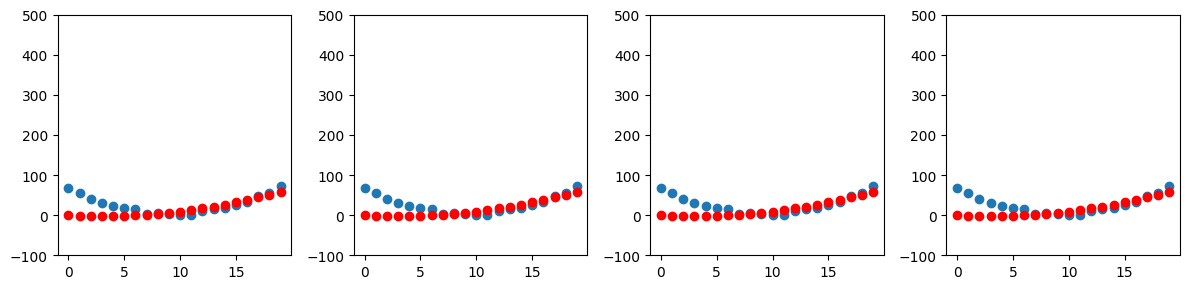

In [157]:
# Plot some of the iterations

_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()


## Step 7: Stop

We decided to stop after 10 epochs arbitrarily. In reality, we would watch the training and validation losses and our metrics to decide when to stop.

# The MNIST Loss Function

Already have our independent variables $x$, the images themselves. Concatenate them into a single tensor and change them from a list of matrices (rank-3 tensor) to a list of vectors (rank-2 tensor). Can do this using `view`, which is a PyTorch method that changes the shape of a tensor without changing its contents. `-1` is a special parameter to `view` that means "make this axis as big as necessary to fit all the data".

In [158]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [159]:
# Need a label for each image. Use 1 for 3s and 0 for 7s:

train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

A PyTorch `Dataset` is required to return a tuple of `(x, y)` when indexed.

Python provides a `zip` function that we can combine with `list` to get this pretty simply:

In [160]:
dset = list(zip(train_x, train_y))

x, y = dset[0]

x.shape, y

(torch.Size([784]), tensor([1]))

In [161]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

valid_dset = list(zip(valid_x, valid_y))

In [162]:
# Randomly initialize a weight for each pixel in the image:

def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [163]:
weights = init_params((28*28, 1))

In [164]:
# Initialize a random bias term as well

bias = init_params(1)

In neural networks, $w$ in the equation $y = wx + b$ is called the *weights*, and the $b$ is the *biases*, which together make up the *parameters*.

In [165]:
# Calculate a prediction for one image:

(train_x[0]*weights.T).sum() + bias

tensor([23.4310], grad_fn=<AddBackward0>)

In [166]:
# In Python, matrix multiplication is represented with the @ operator:

def linear1(xb): return xb@weights + bias

preds = linear1(train_x)

preds

tensor([[ 23.4310],
        [ 14.9271],
        [ 19.5430],
        ...,
        [-10.4461],
        [  9.4247],
        [-11.9134]], grad_fn=<AddBackward0>)

To check the accuracy, can just see if it is greater than zero.

Use broadcasting for this, so no loops are needed:

In [167]:
corrects = (preds>0.0).float() == train_y

corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [False],
        [ True]])

In [168]:
corrects.float().mean().item()

0.7929170727729797

See what the change in accuracy is for a small change in one of the weights.

Going to tell PyTorch to not calculate gradients as we do this, which is what `with torch.no_grad()` is doing:

In [169]:
with torch.no_grad(): weights[0] *= 1.001

In [170]:
preds = linear1(train_x)

((preds > 0.0).float() == train_y).float().mean().item()

0.7929170727729797

Why not just use accuracy (which is our metric here) as our loss function?

Technical problem though:

Gradient of a function is its slope. We don't really get any new information if we change the weights at all. In other words, the gradient is 0 almost everywhere.

In mathematical terms, accuracy is a function that is constant almost everywhere (except at the threshold, 0.5), so its derivative is nil almost everywhere (and infinity at the threshold). This then gives gradients that are 0 or infinite, which are useless for updating the model.

*This* is why we need a special kind of loss function.

The purpose of the loss function is to measure the difference between predicted values and the true values (the *targets* or *labels*).

The loss function receives the predictions from the model.

In [171]:
# Example: Suppose we have three images which we knew were a 3, a 7, and a 3.
# Assume the model predicted accurately the first was a 3, the second was
# a 7, and with fair confidence, but incorrectly, that the last was a 7.

# So our loss function gets the following as inputs:

trgts = tensor([1, 0, 1])
prds = tensor([0.9, 0.4, 0.2])

In [172]:
# First try at a loss function that measures the distance between predictions
# and targets:

def mnist_loss(predictions, targets):
  return torch.where(targets==1, 1-predictions, predictions).mean()

The `torch.where(a, b, c)` function measures how distant each prediction is from 1 if it should be 1, how distant each prediction is from 0 if it should be 0, and then it will take the mean of all those differences.

This could be written in regular Python, but this PyTorch function runs at C/CUDA speed.

In [173]:
# Try this on prds and trgts:

torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [174]:
# Need a scalar for the final value, so use mnist_loss which takes the mean:

mnist_loss(prds, trgts)

tensor(0.4333)

In [175]:
# Update mnist_loss to use sigmoid to handle inputs that aren't 0 and 1:

def mnist_loss(predictions, targets):

  predictions = predictions.sigmoid()

  return torch.where(targets==1, 1-predictions, predictions).mean()

## Metric vs. Loss

A metric is to drive human understanding, and the loss is to drive automated learning.

# SGD and Mini-Batches

We have a loss function that drives SGD. The next step is to *optimize* the learning process to change or update the weights based on the gradients.

Question: Could take the average loss over the entire dataset, or for each data point. Which one do we do?

This is where the *mini-batch* comes in. It balances both of these. Typically want to randoml shuffle these as well to avoid overfitting.

PyTorch and fastai provide a class that does the shuffling and mini-batch collation for you, called `DataLoader`.

A `DataLoader` can take any Python collection and turn it into an iterator over mini-batches:

In [176]:
coll = range(15)

dl = DataLoader(coll, batch_size=5, shuffle=True)

list(dl)

[tensor([ 3, 11, 10,  1,  6]),
 tensor([ 7, 14,  5,  4, 13]),
 tensor([ 0,  2, 12,  9,  8])]

In [177]:
# Want to pass a Dataset to a DatLoader typically:

ds = L(enumerate(string.ascii_lowercase))

ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [178]:
# DataLoader can take any Python collection and turn it into an iterator over
# mini-batches:

coll = range(15)

dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([12,  6,  1, 14,  8]),
 tensor([11, 13,  3,  2,  7]),
 tensor([ 4,  0, 10,  9,  5])]

In [179]:
dl = DataLoader(ds, batch_size=5, shuffle=True)
list(dl)

[(tensor([ 7,  3,  8, 12,  1]), ('h', 'd', 'i', 'm', 'b')),
 (tensor([22,  9, 23,  2,  5]), ('w', 'j', 'x', 'c', 'f')),
 (tensor([15, 17, 19,  0,  4]), ('p', 'r', 't', 'a', 'e')),
 (tensor([11, 21,  6, 10, 25]), ('l', 'v', 'g', 'k', 'z')),
 (tensor([18, 24, 16, 20, 13]), ('s', 'y', 'q', 'u', 'n')),
 (tensor([14]), ('o',))]

# Putting Everything Together

Training process pseudocode:

``` python
for x, y in dl:
  pred = model(x)
  loss = loss_func(pred, y)
  loss.backward()
  parameters -= parameters.grad*lr
```

In [180]:
# Re-initialize parameters

weights = init_params((28*28, 1))

bias = init_params(1)

In [181]:
# Create a DataLoader from a Dataset:

dl = DataLoader(dset, batch_size=256)

xb, yb = first(dl)

xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [182]:
# Do the same for the validation set:

valid_dl = DataLoader(valid_dset, batch_size=256)

In [183]:
# Create a mini-batch of size 4 for testing:

batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [184]:
preds = linear1(batch)

preds

tensor([[ 9.3721],
        [20.6577],
        [10.2663],
        [23.8791]], grad_fn=<AddBackward0>)

In [185]:
loss = mnist_loss(preds, train_y[:4])

loss

tensor(2.9981e-05, grad_fn=<MeanBackward0>)

In [186]:
# Calculate the gradients

loss.backward()

weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-4.2865e-06), tensor([-2.9979e-05]))

In [187]:
# Put all of this in a function now:

def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [188]:
# Test our new function:

calc_grad(batch, train_y[:4], linear1)

weights.grad.mean(), bias.grad

(tensor(-8.5730e-06), tensor([-5.9958e-05]))

In [189]:
# Call it twice to see the change in gradients

calc_grad(batch, train_y[:4], linear1)

weights.grad.mean(), bias.grad

(tensor(-1.2859e-05), tensor([-8.9937e-05]))

The reason why the gradients have changed is that `loss.backward` adds the gradients of `loss` to any gradients currently stored. So we need to set the current gradients to zero first:

In [190]:
weights.grad.zero_()
bias.grad.zero_();

**Note**: Methods in PyTorch that have names that end in an underscore modify their objects *in place*. So `bias.zero_()` sets all the elements of the tensor `bias` to zero.

Now we need to update the weights and biases based on the gradient and learning rate.

Note that we need to make sure to tell PyTorch not to take the gradient of this step too.

Basic training loop for an epoch:

In [191]:
def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

Also want to check how we're doing by looking at the accuracy of the validation set.

To decide if an output represents a 3 or a 7, just check whether it's greater than 0. Can check this with broadcasting with

In [192]:
(preds>0.0).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

In [193]:
# Function to calculate our validation accuracy:

def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [194]:
# Check if it works:

batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [195]:
# Put the batches together:

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [196]:
validate_epoch(linear1)

0.6926

In [197]:
# Train for one epoch and see if the acuracy improves

lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.726

In [198]:
# Do a few more

for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.8705 0.9155 0.9374 0.9477 0.9536 0.957 0.9609 0.9628 0.9657 0.9662 0.9682 0.9696 0.9706 0.9716 0.9731 0.9731 0.9736 0.9736 0.9736 0.974 

# Creating an Optimizer

An *optimizer* in PyTorch language is an object that can handle SGD for us.

First thing we do is replace the `linear1` function with PyTorch's `nn.Linear` module.

A module is an object of a class that inherits from the PyTorch `nn.Module` class. Objects of this class behave identically to standard Python functions, in that you can call them using parentheses and they'll return the activations of a model.

``nn.Linear` does the same thing as our `init_params` and `linear` together. It contains both the weights and biases in a single class.

Replicating our model from the previous section:

In [199]:
linear_model = nn.Linear(28*28, 1)

In [200]:
# Can pull the parameters from each module:

w, b = linear_model.parameters()

w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [201]:
# Can use this information to create an optimizer:


class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [202]:
# Create optimizer by passing in the model's parameters:

opt = BasicOptim(linear_model.parameters(), lr)

In [203]:
# Training loop is now:

def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [204]:
# Validation function doesn't change:

validate_epoch(linear_model)

0.4945

In [205]:
# Put the training loop in a function to simplify:

def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [206]:
# Results are the same as before:

train_model(linear_model, 20)

0.4932 0.8637 0.8306 0.9136 0.9326 0.9477 0.955 0.9624 0.9653 0.9668 0.9692 0.9716 0.9736 0.9746 0.9755 0.9765 0.9775 0.9785 0.9785 0.9785 

In [207]:
# Can use the SGD class from fastai, which does the
# same thing as our BasicOptim:

linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.854 0.8276 0.9102 0.9321 0.9467 0.955 0.9624 0.9653 0.9672 0.9692 0.9716 0.9731 0.9751 0.976 0.9765 0.9775 0.978 0.978 0.9785 

fastai also has `Learner.fit`, which can be used instead of `train_model`.

To create a `Learner` we first need to create a `DataLoaders` by passing in our training and validation `DataLoader`s:

In [208]:
dls = DataLoaders(dl, valid_dl)

To create a `Learner` without using an application (like `vision_learner`), need to pass in all the elements that we've created so far:

* The `DataLoaders`
* The model
* The optimization function (passed in the parameters)
* Loss function
* Any parameters we want to print

In [209]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [210]:
# Call fit:

learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637237,0.503504,0.495584,00:00
1,0.537041,0.171635,0.865554,00:00
2,0.196296,0.192469,0.824828,00:00
3,0.085618,0.109297,0.909715,00:00
4,0.044868,0.079158,0.933268,00:00
5,0.029003,0.063254,0.946025,00:00
6,0.022525,0.053349,0.954858,00:00
7,0.019683,0.046742,0.962709,00:00
8,0.018267,0.042112,0.965162,00:00
9,0.017431,0.038716,0.967125,00:00


# Adding a Nonlinearity

We've only optimized the parameters of a linear function for a classifier. That's pretty constrained.

To make things more complex and flexible, need to add something nonlinear between two linear classifiers, which gives us a neural network.

Neural network definition:

```python
def simple_net(xb):
  
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2

  return res
```
where `w1` and `w2` are the weight tensors, and `b1` and `b2` are the bias tensors. These are initially randomly initialized, just like we did previously.

In [211]:
def simple_net(xb):

  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2

  return res

In [212]:
w1 = init_params((28*28, 30))
w2 = init_params((30, 1))

b1 = init_params(30)
b2 = init_params(1)

Note that `w1` has 30 output activations, so `w2` needs to have 30 input activations so they match.

The `res.max(tensor(0.0))` is the ReLU (rectified linear unit). Also available in PyTorch as `F.relu`.

In [213]:
# Replace the simple_net with simpler PyTorch code:

simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [214]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.309066,0.409526,0.504907,00:00
1,0.144302,0.229388,0.801276,00:00
2,0.080293,0.115601,0.915113,00:00
3,0.053037,0.078019,0.940628,00:00
4,0.040376,0.060851,0.957802,00:00
5,0.033896,0.051204,0.963690,00:00
6,0.030162,0.045145,0.965653,00:00
7,0.027725,0.041015,0.967125,00:00
8,0.025962,0.038016,0.968106,00:00
9,0.024591,0.035728,0.970069,00:00


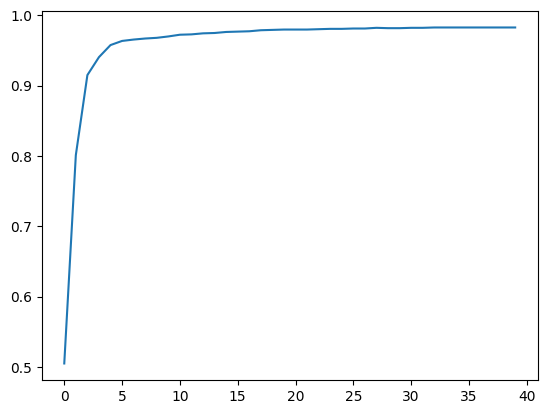

In [215]:
# Plot accuracy

plt.plot(L(learn.recorder.values).itemgot(2));

In [216]:
# Final accuracy

learn.recorder.values[-1][2]

0.982826292514801

Here's the insane thing. We just built something that can do the following two things:

1. A function that can solve any problem to any level of accuracy (the neural network) given the correct set of parameters.

2. A way to find the best set of parameters for any function (SGD).

These two items are the reason why deep learning can do things that seem like magic.

Internalizing this fact is one of the biggest steps we'll need to take.

# Going Deeper

Reasons for more than two linear layers:



*   Performance
*   Don't need to use as many parameters, which means smaller matrices with more layers.
  * This gives us better results than we would get with larger matrices and fewer layers.
  * This also means that we can train the model more quickly and have it take up less memory.




In [217]:
# Training the first model from the intro, but with 18 layers now:

dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)

learn.fit_one_cycle(1, 0.1)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.120923,0.013033,0.995093,00:25


We got nearly 100% accuracy, just by changing the number of layers. That's insane.

# Jargon Recap

A neural network contains a lot of numbers, but they are only of two types: numbers that are calculated, and the parameters that these numbers are calculated from. This gives us the two most important pieces of jargon to learn:

* Activations: Numbers that are calculated (both by linear and nonlinear layers).
* Parameters: Numbers that are randomly initialized, and then optimized (that is, the numbers that define the model).


